In [9]:
import pandas as pd
import seaborn as sns

In [10]:
sns.set()
sns.set_theme(style="whitegrid", palette="colorblind")
# themes are listed at: https://seaborn.pydata.org/tutorial/aesthetics.html
# palettes are listed at: https://seaborn.pydata.org/tutorial/color_palettes.html

In [11]:
region_data = pd.read_csv(
    "..\WID_Data_regions\WID_Data_Metadata\WID_Data_02012024-235418.csv", sep=";"
)

In [12]:
region_data

,Percentile,Year,sptinc_z_QB Pre-tax national income Top 10% | share Africa,sptinc_z_QD Pre-tax national income Top 10% | share Asia,sptinc_z_XL Pre-tax national income Top 10% | share Latin America,sptinc_z_QE Pre-tax national income Top 10% | share Europe,sptinc_z_XM Pre-tax national income Top 10% | share Middle East,sptinc_z_QF Pre-tax national income Top 10% | share Oceania,sptinc_z_QP Pre-tax national income Top 10% | share North America
0,p90p100,1820,NaN,NaN,0.5405,0.4845,NaN,0.4429,0.4221
1,p90p100,1821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p90p100,1822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p90p100,1823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p90p100,1824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
604,p99p100,2018,0.1999,0.1921,0.2292,0.1240,0.2274,0.1106,0.1920
605,p99p100,2019,0.1973,0.1873,0.2258,0.1232,0.2223,0.1133,0.1901
606,p99p100,2020,0.1966,0.1932,0.2293,0.1240,0.2244,0.1219,0.1785
607,p99p100,2021,0.1984,0.1925,0.2214,0.1138,0.2190,0.1133,0.1901


In [13]:
region_data["Percentile"].unique()

array(['p90p100', 'p0p50', 'p99p100'], dtype=object)

In [14]:
region_data.columns

Index(['Percentile', 'Year',
       'sptinc_z_QB Pre-tax national income Top 10% | share Africa',
       'sptinc_z_QD Pre-tax national income Top 10% | share Asia',
       'sptinc_z_XL Pre-tax national income Top 10% | share Latin America',
       'sptinc_z_QE Pre-tax national income Top 10% | share Europe',
       'sptinc_z_XM Pre-tax national income Top 10% | share Middle East',
       'sptinc_z_QF Pre-tax national income Top 10% | share Oceania',
       'sptinc_z_QP Pre-tax national income Top 10% | share North America'],
      dtype='object')

In [15]:
region_data = region_data.rename(
    columns={
        "sptinc_z_QB Pre-tax national income Top 10% | share Africa": "Africa",
        "sptinc_z_QD Pre-tax national income Top 10% | share Asia": "Asia",
        "sptinc_z_XL Pre-tax national income Top 10% | share Latin America": "Latin America",
        "sptinc_z_QE Pre-tax national income Top 10% | share Europe": "Europe",
        "sptinc_z_XM Pre-tax national income Top 10% | share Middle East": "Middle East",
        "sptinc_z_QF Pre-tax national income Top 10% | share Oceania": "Oceania",
        "sptinc_z_QP Pre-tax national income Top 10% | share North America": "North America",
    }
)

In [16]:
pd.to_datetime(region_data["Year"])

0     1970-01-01 00:00:00.000001820
1     1970-01-01 00:00:00.000001821
2     1970-01-01 00:00:00.000001822
3     1970-01-01 00:00:00.000001823
4     1970-01-01 00:00:00.000001824
                   ...             
604   1970-01-01 00:00:00.000002018
605   1970-01-01 00:00:00.000002019
606   1970-01-01 00:00:00.000002020
607   1970-01-01 00:00:00.000002021
608   1970-01-01 00:00:00.000002022
Name: Year, Length: 609, dtype: datetime64[ns]

<Axes: title={'center': 'Share of National Income in Major Regions \nOwned by Different Percentile Groups'}, xlabel='Year', ylabel='Share of National Income Owned by Percentile group'>

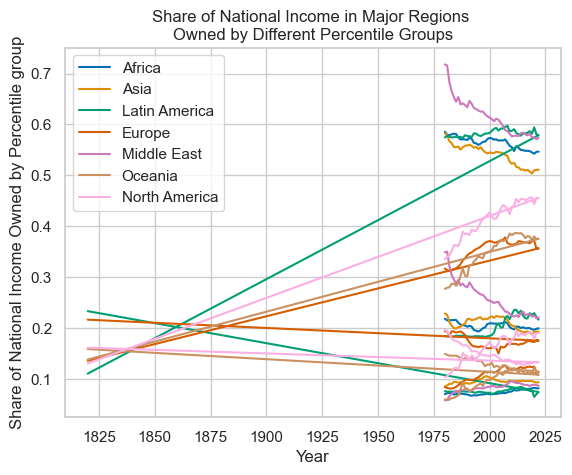

In [17]:
region_data.set_index("Year").plot(
    title="Share of National Income in Major Regions \nOwned by Different Percentile Groups",
    xlabel="Year",
    ylabel="Share of National Income Owned by Percentile group",
)

Percentile
p0p50      Axes(0.125,0.11;0.775x0.77)
p90p100    Axes(0.125,0.11;0.775x0.77)
p99p100    Axes(0.125,0.11;0.775x0.77)
dtype: object

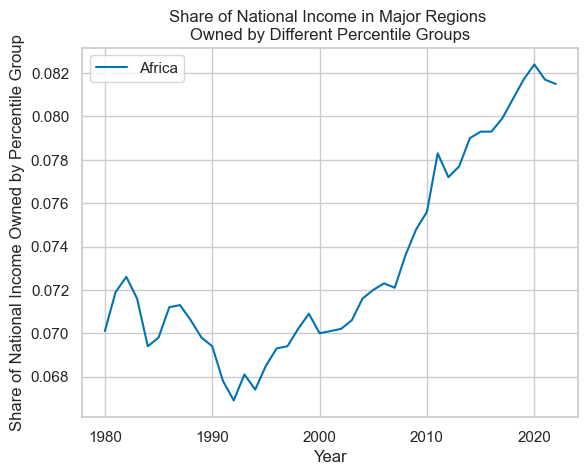

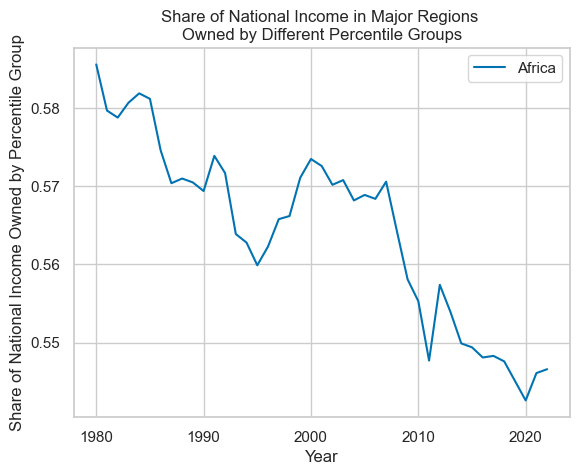

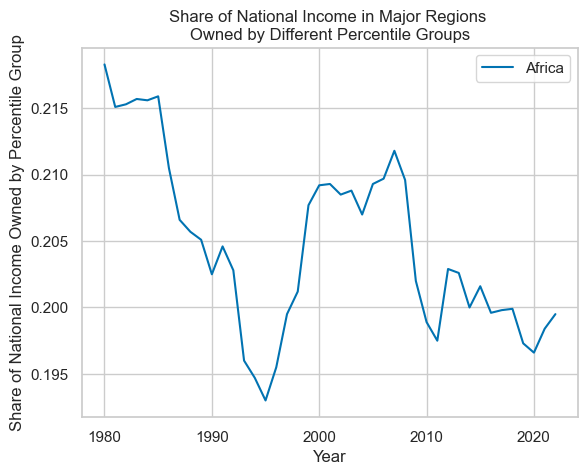

In [18]:
# That was not ideal. Let's start from 1980, when the data is better, and go region by region.

# Africa
region_data.loc[region_data["Year"] > 1979][["Year", "Percentile", "Africa"]].set_index(
    "Year"
).groupby(["Percentile"]).plot(
    title="Share of National Income in Major Regions \nOwned by Different Percentile Groups",
    xlabel="Year",
    ylabel="Share of National Income Owned by Percentile Group",
)

In [19]:
basic_percentile_groups = ["p0p50", "p90p100", "p99p100"]

In [20]:
region_data\
    .loc[region_data['Year'] > 1979]\
    [['Year', 'Percentile', 'Africa']]\
    .head

<bound method NDFrame.head of      Year Percentile  Africa
160  1980    p90p100  0.5856
161  1981    p90p100  0.5797
162  1982    p90p100  0.5788
163  1983    p90p100  0.5807
164  1984    p90p100  0.5819
..    ...        ...     ...
604  2018    p99p100  0.1999
605  2019    p99p100  0.1973
606  2020    p99p100  0.1966
607  2021    p99p100  0.1984
608  2022    p99p100  0.1995

[129 rows x 3 columns]>

In [21]:
region_data\
    .loc[region_data['Year'] > 1979]\
    [['Year', 'Percentile', 'Africa']]\
    .pivot(index='Year', columns='Percentile', values='Africa')\
    .head

<bound method NDFrame.head of Percentile   p0p50  p90p100  p99p100
Year                                
1980        0.0701   0.5856   0.2183
1981        0.0719   0.5797   0.2151
1982        0.0726   0.5788   0.2153
1983        0.0716   0.5807   0.2157
1984        0.0694   0.5819   0.2156
1985        0.0698   0.5812   0.2159
1986        0.0712   0.5746   0.2105
1987        0.0713   0.5704   0.2066
1988        0.0706   0.5710   0.2057
1989        0.0698   0.5705   0.2051
1990        0.0694   0.5694   0.2025
1991        0.0678   0.5739   0.2046
1992        0.0669   0.5717   0.2028
1993        0.0681   0.5639   0.1960
1994        0.0674   0.5628   0.1947
1995        0.0685   0.5599   0.1930
1996        0.0693   0.5623   0.1955
1997        0.0694   0.5658   0.1995
1998        0.0702   0.5662   0.2012
1999        0.0709   0.5711   0.2077
2000        0.0700   0.5735   0.2092
2001        0.0701   0.5726   0.2093
2002        0.0702   0.5702   0.2085
2003        0.0706   0.5708   0.2088
2004    

In [22]:
region_data.loc[region_data['Year'] > 1979][['Year', 'Percentile', 'Africa']].pivot(index='Year', columns='Percentile', values='Africa')


Percentile,p0p50,p90p100,p99p100
Year,,,
1980,0.0701,0.5856,0.2183
1981,0.0719,0.5797,0.2151
1982,0.0726,0.5788,0.2153
1983,0.0716,0.5807,0.2157
1984,0.0694,0.5819,0.2156
1985,0.0698,0.5812,0.2159
1986,0.0712,0.5746,0.2105
1987,0.0713,0.5704,0.2066
1988,0.0706,0.5710,0.2057


In [23]:
list_of_regions = [
    "Africa",
    "Asia",
    "Latin America",
    "Europe",
    "Middle East",
    "Oceania",
    "North America",
]

In [24]:
percentile_group_renaming_dict = {
    "p0p50": "Bottom 50%",
    "p90p100": "Top 10%",
    "p99p100": "Top 1%"
}

In [25]:
def pivot_df_on_column_and_plot(
    data_frame_in, column_with_data_to_plot, subset_column_names
):
    values_as_percentages = data_frame_in[subset_column_names]
    values_as_percentages.loc[:, column_with_data_to_plot] = values_as_percentages[column_with_data_to_plot] * 100

    pivoted_data = values_as_percentages\
        [subset_column_names]\
        .pivot(
            index='Year', 
            columns='Percentile', 
            values=column_with_data_to_plot
            )

    pivoted_data.columns = [
        percentile_group_renaming_dict[cn] for cn in pivoted_data.columns
    ]


    pivoted_data.plot(
        title="Share of National Income in Major Regions \nOwned by Different Percentile Groups in "
        + column_with_data_to_plot,
        xlabel="Year",
        ylabel="Share of National Income Owned by Percentile Group (%)",
        ylim=(0, 100),
    )

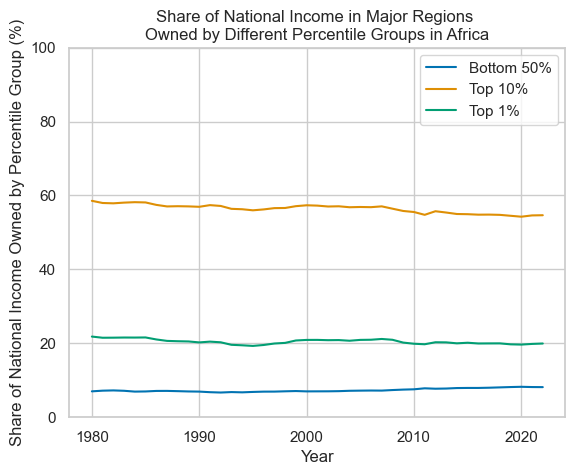

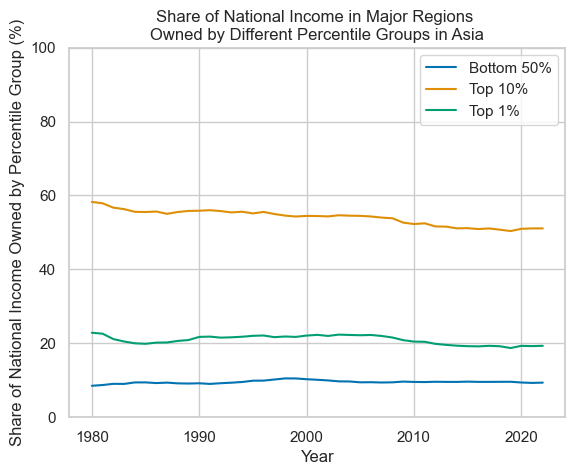

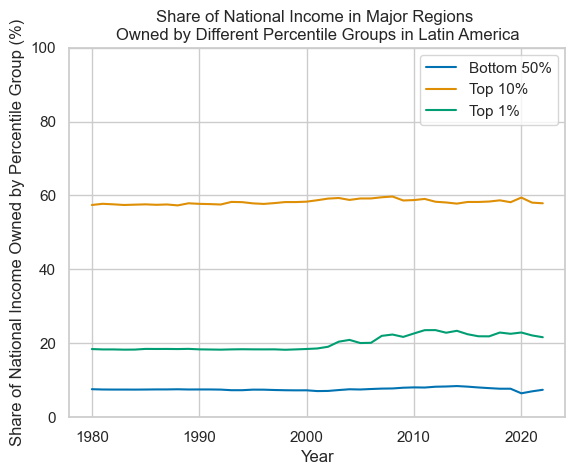

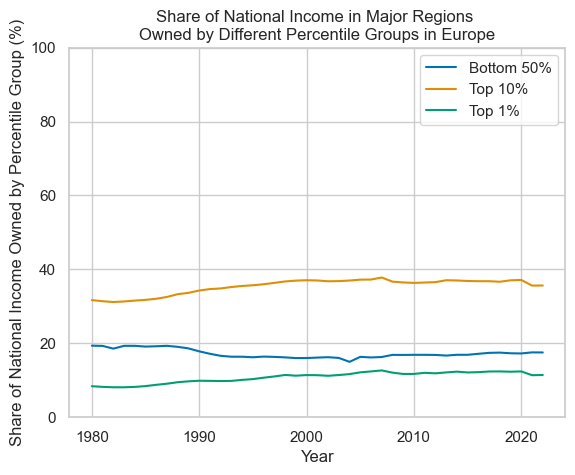

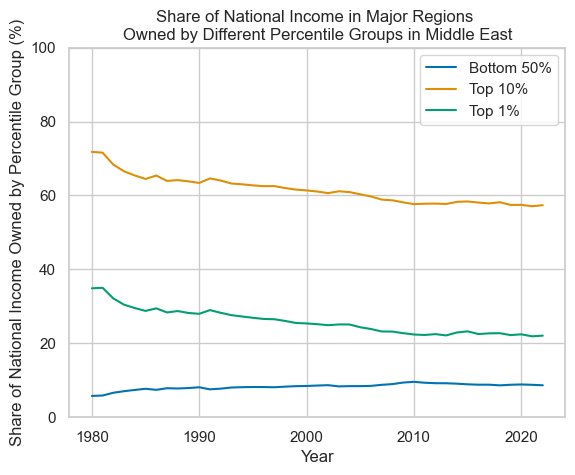

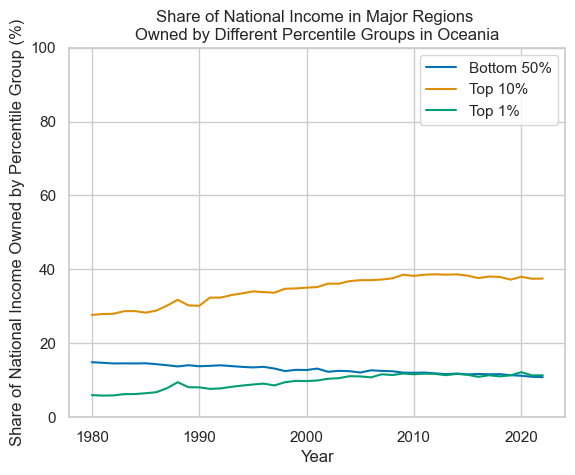

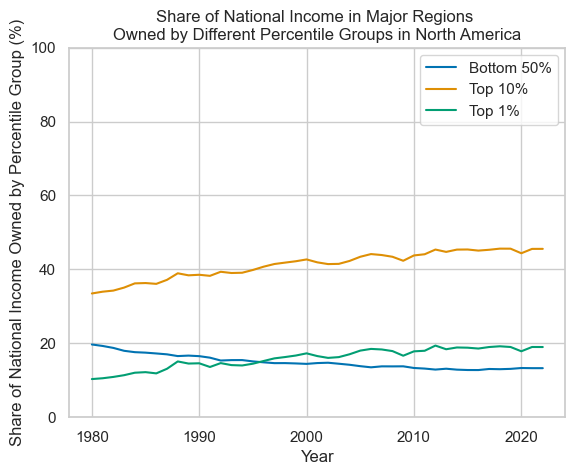

In [26]:
for r in list_of_regions:
    pivot_df_on_column_and_plot(
        region_data.loc[region_data['Year'] > 1979],
        r,
        ['Year', 'Percentile', r]
    )